## Clustering

In [3]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs

# import clustering algs
from sklearn.cluster import KMeans, MeanShift
from sklearn.model_selection import train_test_split

(1000, 2) (1000,) (800, 2) (200, 2) (800,) (200,)


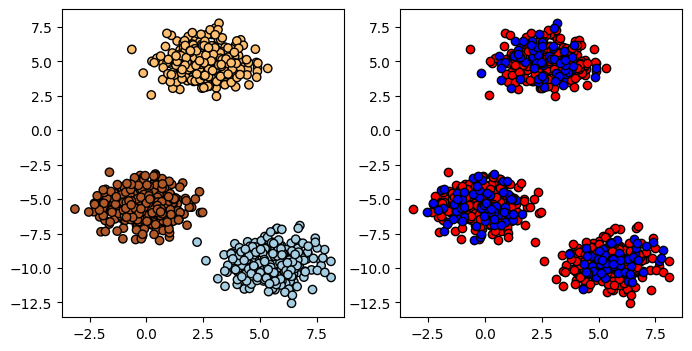

In [5]:
X, y = make_blobs(n_samples = 1000, n_features = 2, random_state=10) #, centers = clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

_, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.scatter( X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Paired')
ax2.scatter( X_train[:, 0], X_train[:, 1], c='r', edgecolors='k')
ax2.scatter( X_test[:, 0], X_test[:, 1], c='b', edgecolors='k')

print (X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# import decision boundaries function
%cd /content/drive/MyDrive/Docencia/Aprendizaje/2023-2/J10/

import sys
sys.path.append('../')
from Tools.utils import plot_decision_boundary

/content/drive/MyDrive/Docencia/Aprendizaje/2023-2/J10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


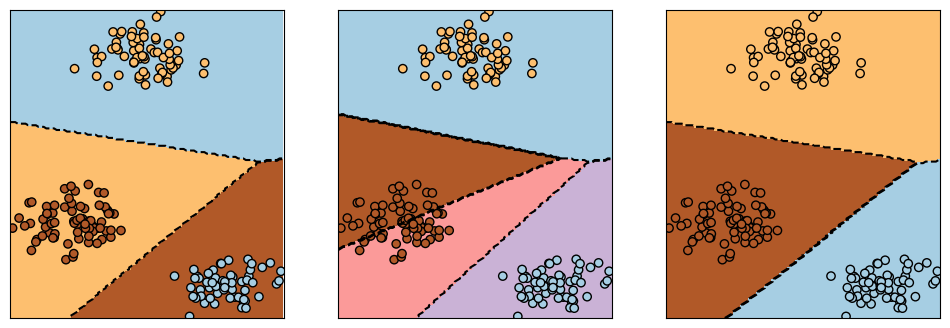

In [11]:
models = [ KMeans(n_clusters=3), KMeans(n_clusters=4), MeanShift() ]

_, axes = plt.subplots(1, 3, figsize = (12,4))
preds = {}; preds = {}

# fit the model
for i, model in enumerate(models) :
    # Instance and train
    model.fit(X_train)

    # Predictions on train and test sets
    preds[i] = model.predict(X_test)

    # Plot everything
    plot_decision_boundary(model, X_test, y_test, ax=axes[i])

plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [12]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [20]:
## Scores for training data

for i in range(len(preds)) :
  print ("########----- Results for {0} -----########".format( i ))
  ari = adjusted_rand_score( y_test , preds[i] )
  ami = adjusted_mutual_info_score( y_test , preds[i] )
  sil = silhouette_score( y_test.reshape(-1,1), preds[i].reshape(-1,1), metric="euclidean")
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL -- ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for 0 -----########
-- ARI --	 -- AMI --	 -- SIL -- 
  1.000  	   1.000  	   1.000  	
########----- Results for 1 -----########
-- ARI --	 -- AMI --	 -- SIL -- 
  0.843  	   0.896  	   0.635  	
########----- Results for 2 -----########
-- ARI --	 -- AMI --	 -- SIL -- 
  1.000  	   1.000  	   1.000  	


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Scores for test data

for i, key in enumerate(predsT.keys()):
  print ("########----- Results for {0} -----########".format( _ ))
  ari = adjusted_rand_score( _ , _ )
  ami = adjusted_mutual_info_score( _ , _ )
  ##--------------
  print("-- ARI --\t -- AMI --\t --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami))

## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()